<a href="https://colab.research.google.com/github/Sara2539360/Excel/blob/main/Final_ML_Project_E_Comm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Sara2539360/Final-ML-E-Comm/refs/heads/main/Train.csv')

In [2]:
print("Dataset Shape:", df.shape)

Dataset Shape: (10999, 12)


In [3]:
print("Dataset Columns:", df.columns)

Dataset Columns: Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')


In [4]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64


In [5]:
print("Data Types:\n", df.dtypes)

Data Types:
 ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object


In [6]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [7]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


## Visualizatios

###  Histogram of Numerical Features

#### Discount_offered:
Skewed distribution indicating discounts are concentrated in a specific range.
#### Customer_rating:
 Nearly uniform distribution, highlighting consistent customer responses.
#### Weight_in_gms:
 Normal-like distribution with a peak near the center.

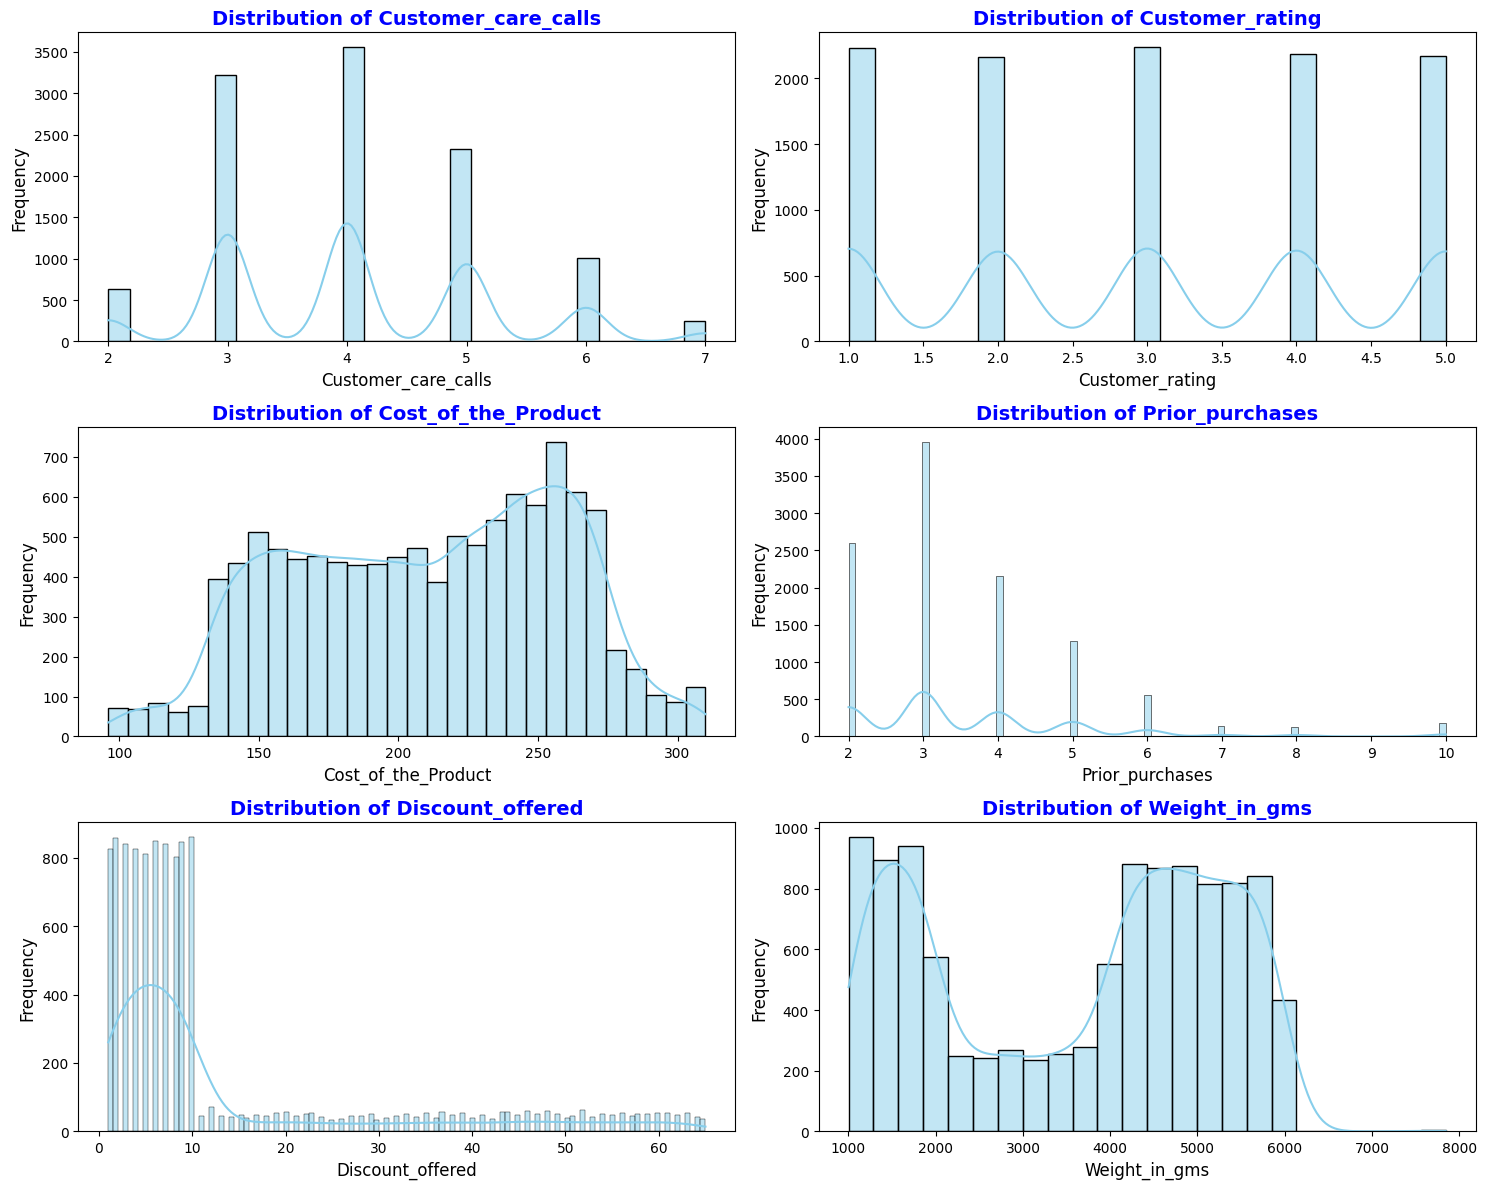

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

numerical_columns = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
                     'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold', color='blue')
    plt.xlabel(col, fontsize=12, color='black')
    plt.ylabel('Frequency', fontsize=12, color='black')
plt.tight_layout()
plt.show()


## Count plot

#### Warehouse_block:
Blocks A and F have the highest counts.
#### Gender:
Balanced dataset, though slightly more males.

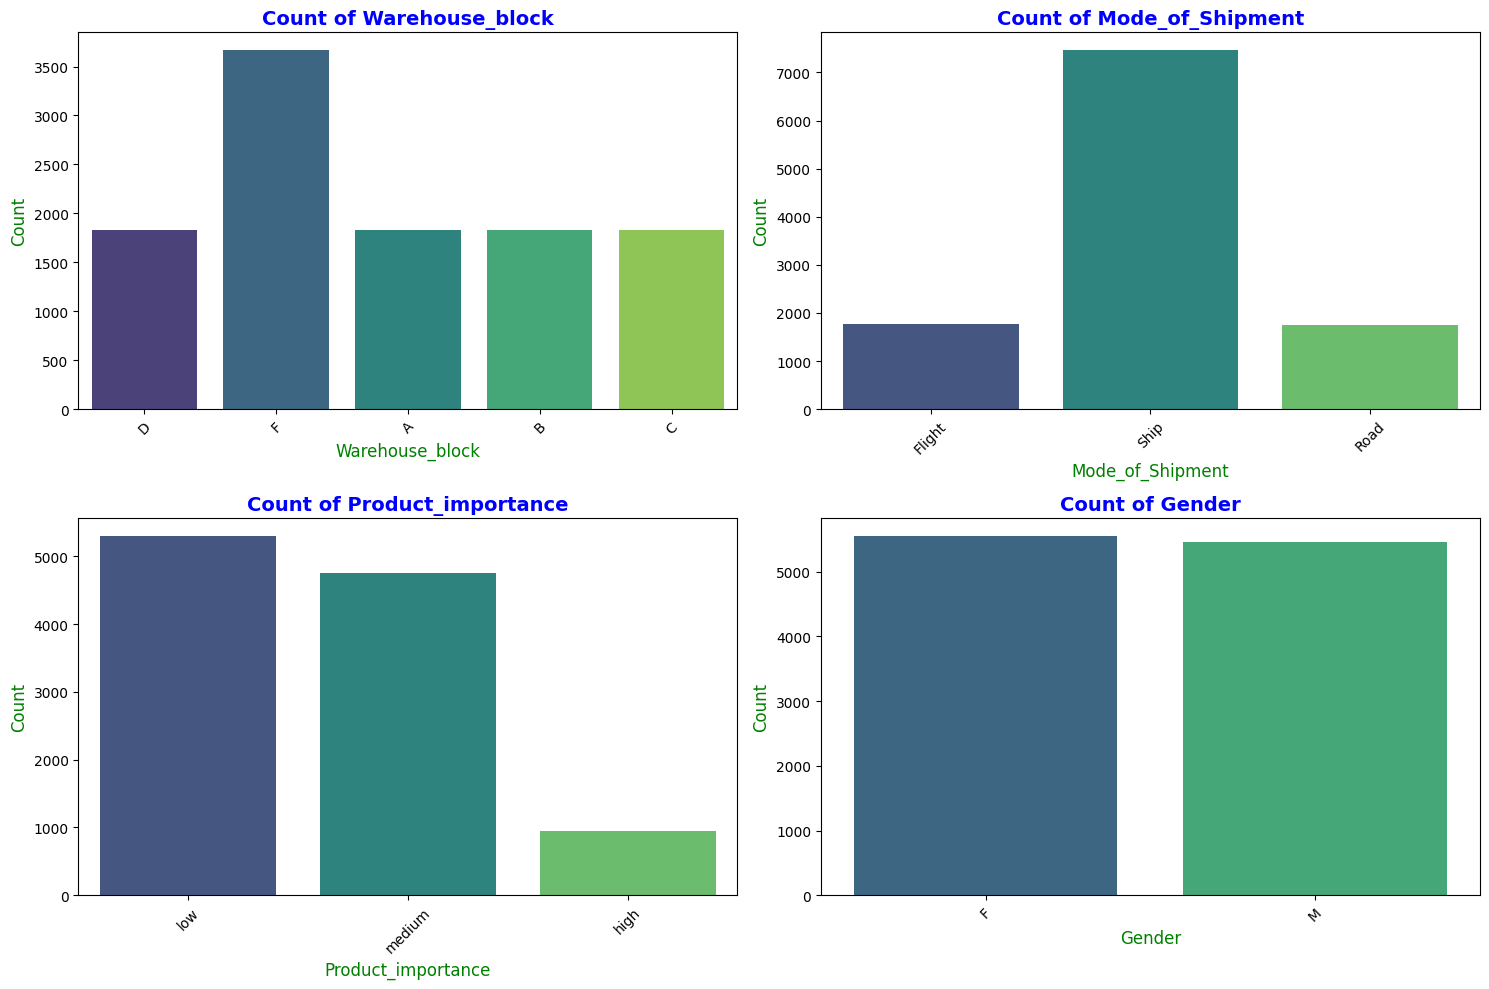

In [13]:
categorical_columns = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Count of {col}', fontsize=14, fontweight='bold', color='blue')
    plt.xlabel(col, fontsize=12, color='green')
    plt.ylabel('Count', fontsize=12, color='green')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Box Plot
Mode of Shipment vs. Customer Ratings

Air shipment has the highest median rating, and on-time deliveries are better rated across all modes.


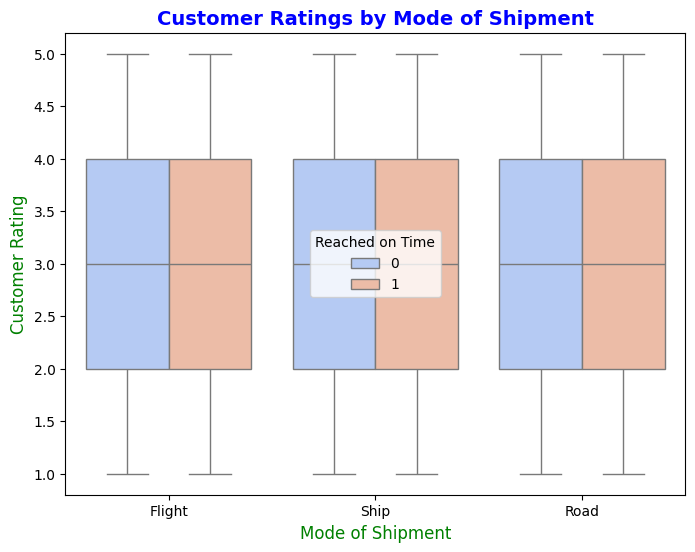

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Mode_of_Shipment', y='Customer_rating', hue='Reached.on.Time_Y.N', palette='coolwarm')
plt.title('Customer Ratings by Mode of Shipment', fontsize=14, fontweight='bold', color='blue')
plt.xlabel('Mode of Shipment', fontsize=12, color='green')
plt.ylabel('Customer Rating', fontsize=12, color='green')
plt.legend(title='Reached on Time', loc='best')
plt.show()


## Box Plot
Product Importance vs. Discount Offered


Low-importance products offer higher discounts, while high-importance products rarely offer discounts.

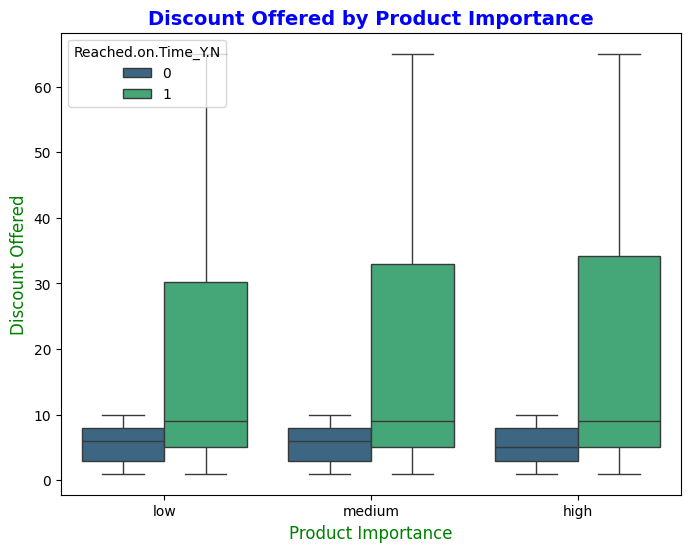

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Product_importance', y='Discount_offered', hue='Reached.on.Time_Y.N', palette='viridis')
plt.title('Discount Offered by Product Importance', fontsize=14, fontweight='bold', color='blue')
plt.xlabel('Product Importance', fontsize=12, color='green')
plt.ylabel('Discount Offered', fontsize=12, color='green')
plt.show()


## Scatter Plot:

#### Customer Care Calls vs. Prior Purchases

Higher customer care calls often correspond to late deliveries.

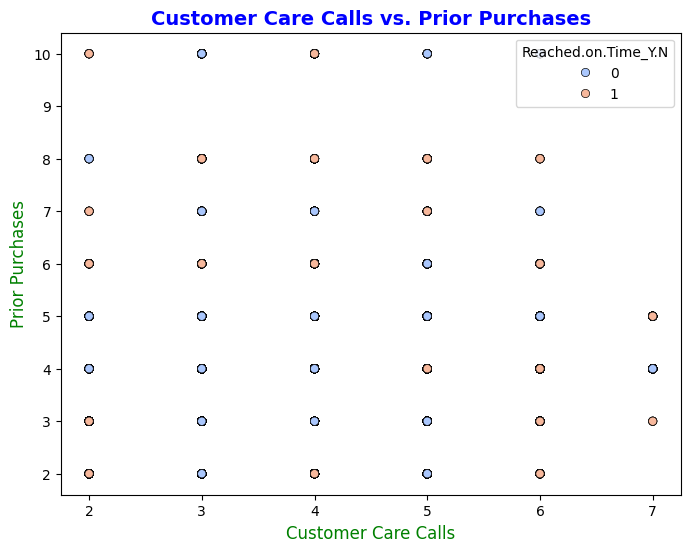

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Customer_care_calls', y='Prior_purchases', hue='Reached.on.Time_Y.N', palette='coolwarm', edgecolor='black')
plt.title('Customer Care Calls vs. Prior Purchases', fontsize=14, fontweight='bold', color='blue')
plt.xlabel('Customer Care Calls', fontsize=12, color='green')
plt.ylabel('Prior Purchases', fontsize=12, color='green')
plt.show()


## Box Plot:

#### Weight in Grams vs. Shipment Mode

Air shipments handle lighter items, while trucks handle heavier shipments.


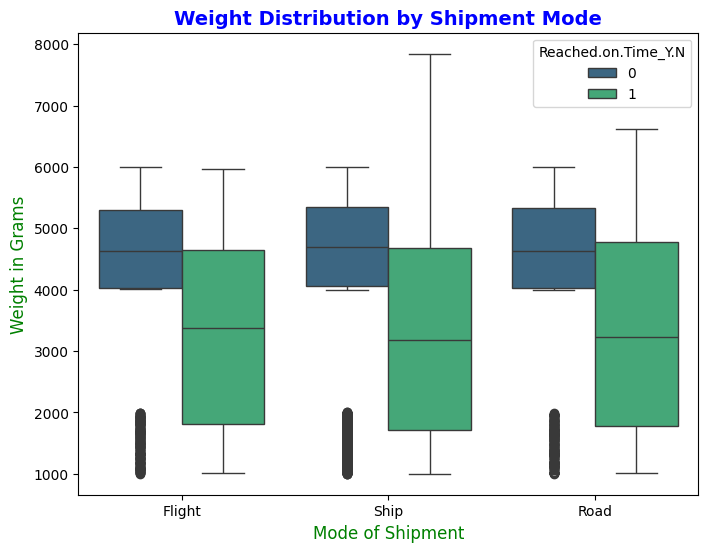

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Mode_of_Shipment', y='Weight_in_gms', hue='Reached.on.Time_Y.N', palette='viridis')
plt.title('Weight Distribution by Shipment Mode', fontsize=14, fontweight='bold', color='blue')
plt.xlabel('Mode of Shipment', fontsize=12, color='green')
plt.ylabel('Weight in Grams', fontsize=12, color='green')
plt.show()


## Violin Plot:

#### Gender vs. Customer Rating
Both genders show similar rating distributions, but males tend to have slightly better ratings for on-time deliveries.

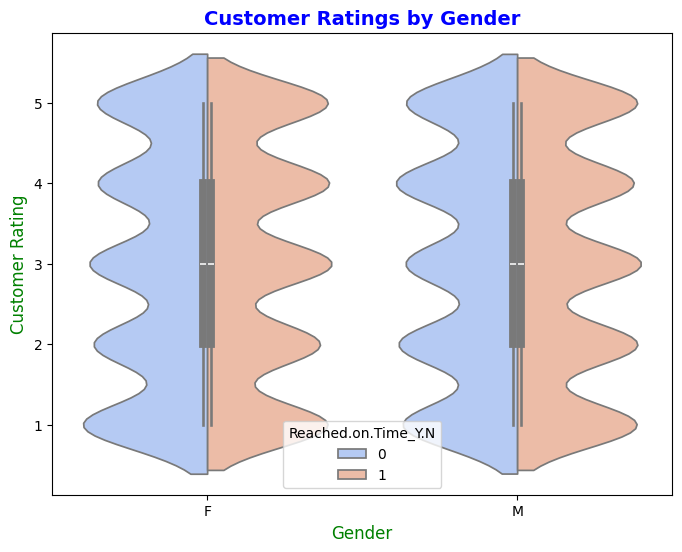

In [18]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Gender', y='Customer_rating', hue='Reached.on.Time_Y.N', split=True, palette='coolwarm')
plt.title('Customer Ratings by Gender', fontsize=14, fontweight='bold', color='blue')
plt.xlabel('Gender', fontsize=12, color='green')
plt.ylabel('Customer Rating', fontsize=12, color='green')
plt.show()


## Count Plot:

#### Reached on Time vs. Product Importance
High-importance products face slightly more delays compared to low-importance products.

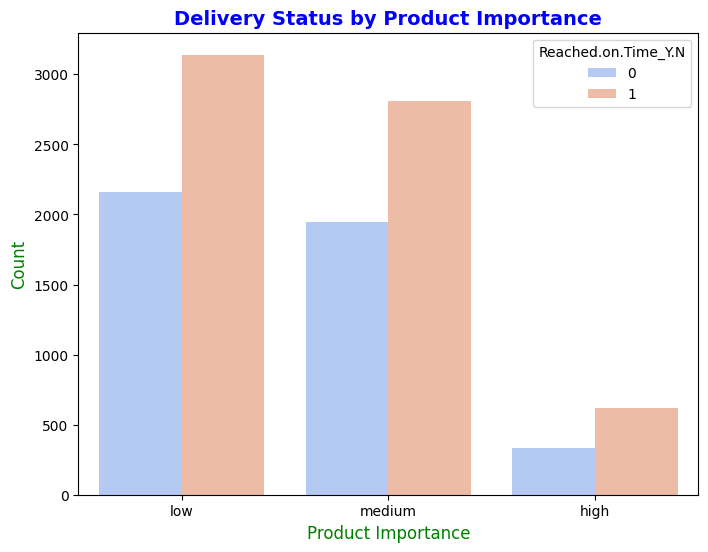

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Product_importance', hue='Reached.on.Time_Y.N', palette='coolwarm')
plt.title('Delivery Status by Product Importance', fontsize=14, fontweight='bold', color='blue')
plt.xlabel('Product Importance', fontsize=12, color='green')
plt.ylabel('Count', fontsize=12, color='green')
plt.show()


## Scatter Plot:

####  Customer Rating vs. Prior Purchases
Higher ratings correlate with fewer prior purchases and better delivery times.

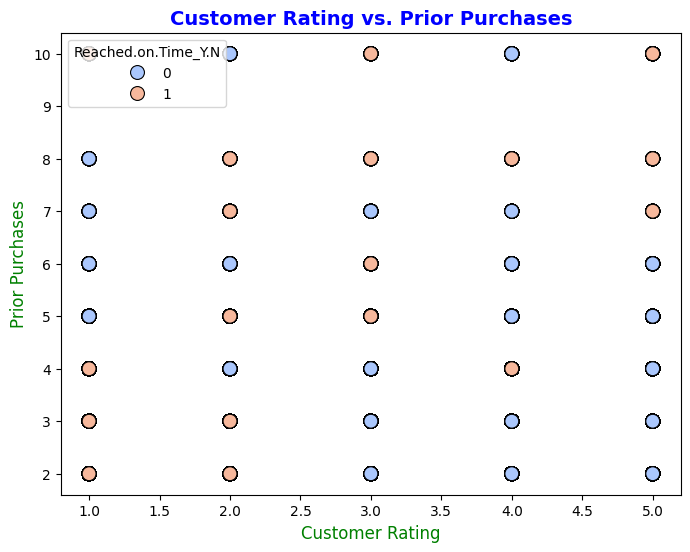

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Customer_rating', y='Prior_purchases', hue='Reached.on.Time_Y.N', palette='coolwarm', s=100, edgecolor='black')
plt.title('Customer Rating vs. Prior Purchases', fontsize=14, fontweight='bold', color='blue')
plt.xlabel('Customer Rating', fontsize=12, color='green')
plt.ylabel('Prior Purchases', fontsize=12, color='green')
plt.show()


## Scatter Plot:

#### Customer Care Calls vs. Discount Offered

Customers making more care calls tend to receive higher discounts but still report delayed deliveries.

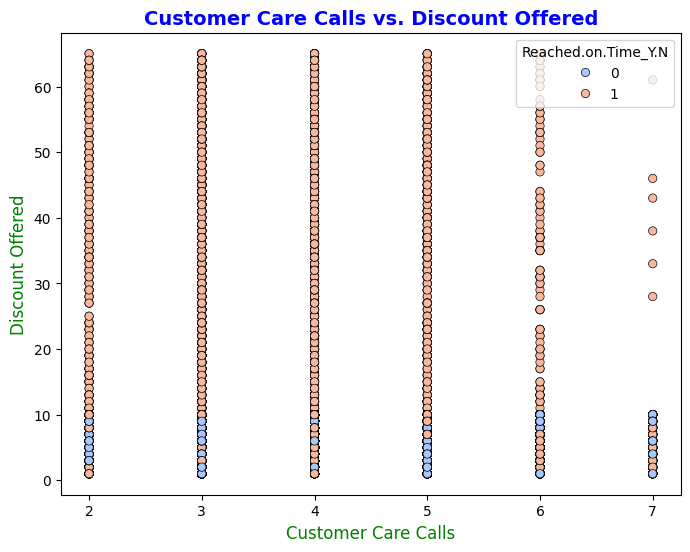

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Customer_care_calls', y='Discount_offered', hue='Reached.on.Time_Y.N', palette='coolwarm', edgecolor='black')
plt.title('Customer Care Calls vs. Discount Offered', fontsize=14, fontweight='bold', color='blue')
plt.xlabel('Customer Care Calls', fontsize=12, color='green')
plt.ylabel('Discount Offered', fontsize=12, color='green')
plt.show()


In [23]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

print("Dataset after Label Encoding:\n")
print(df.head())


Dataset after Label Encoding:

   ID  Warehouse_block  Mode_of_Shipment  Customer_care_calls  \
0   1                3                 0                    4   
1   2                4                 0                    4   
2   3                0                 0                    2   
3   4                1                 0                    3   
4   5                2                 0                    2   

   Customer_rating  Cost_of_the_Product  Prior_purchases  Product_importance  \
0                2                  177                3                   1   
1                5                  216                2                   1   
2                2                  183                4                   1   
3                3                  176                4                   2   
4                2                  184                3                   2   

   Gender  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0       0                44    

## Feature Selection:

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

X = df.drop(columns=['ID', 'Reached.on.Time_Y.N'])
y = df['Reached.on.Time_Y.N']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:\n", feature_importances)


Feature Importances:
                Feature  Importance
9        Weight_in_gms    0.297498
8     Discount_offered    0.208433
4  Cost_of_the_Product    0.176517
0      Warehouse_block    0.061332
3      Customer_rating    0.058972
2  Customer_care_calls    0.054839
5      Prior_purchases    0.054295
1     Mode_of_Shipment    0.032969
6   Product_importance    0.031093
7               Gender    0.024052


Features with high importance (e.g., Discount_offered, Cost_of_the_Product) contribute more to predicting whether a product is delivered on time.

Discard low-importance features if needed to simplify the model without losing accuracy.

## Model Building:



## Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

logistic_model = LogisticRegression(max_iter=500)
logistic_model.fit(X_train, y_train)

y_pred_logistic = logistic_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_logistic))


Logistic Regression Accuracy: 0.6436363636363637
Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.56      0.57      0.57       895
           1       0.70      0.69      0.70      1305

    accuracy                           0.64      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.65      0.64      0.64      2200



## Decision Tree:


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Report:\n", classification_report(y_test, y_pred_dt))


Decision trees handle non-linearity better than Logistic Regression.


## Random Forest:


In [26]:
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.6668181818181819
Random Forest Report:
               precision    recall  f1-score   support

           0       0.57      0.70      0.63       895
           1       0.76      0.64      0.70      1305

    accuracy                           0.67      2200
   macro avg       0.67      0.67      0.66      2200
weighted avg       0.68      0.67      0.67      2200



## Gradient Boosting:

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Gradient Boosting Report:\n", classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.6863636363636364
Gradient Boosting Report:
               precision    recall  f1-score   support

           0       0.58      0.87      0.69       895
           1       0.86      0.56      0.68      1305

    accuracy                           0.69      2200
   macro avg       0.72      0.72      0.69      2200
weighted avg       0.75      0.69      0.68      2200



Gradient Boosting reduces bias and variance effectively.
